# Information Entropy of atoms

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp
import periodictable
import ground_state_functions as RHF

## Constants, elements and Dataframe

In [2]:
Z_range = np.array(range(2,10+1))
elements = [periodictable.elements[i].symbol for i in range(2, 10+1)]
coeff = pd.read_csv("coef_matrices.csv")
coeff[(coeff['Element'] == 'B') & (coeff['orbitals'].str.contains('s'))]

,Element,orbitals,z_coeff,coeff(1s/2p),coeff(2s)
18,B,1s,7.0178,0.381607,-0.022549
19,B,1s,3.9468,0.423958,0.321716
20,B,3s,12.7297,-0.001316,-0.000452
21,B,3s,2.7646,-0.000822,-0.072032
22,B,2s,5.7420,0.237016,-0.050313
23,B,2s,1.5436,0.001062,-0.484281
24,B,2s,1.0802,-0.000137,-0.518986


## RHF for all functions

For the element: He (helium)


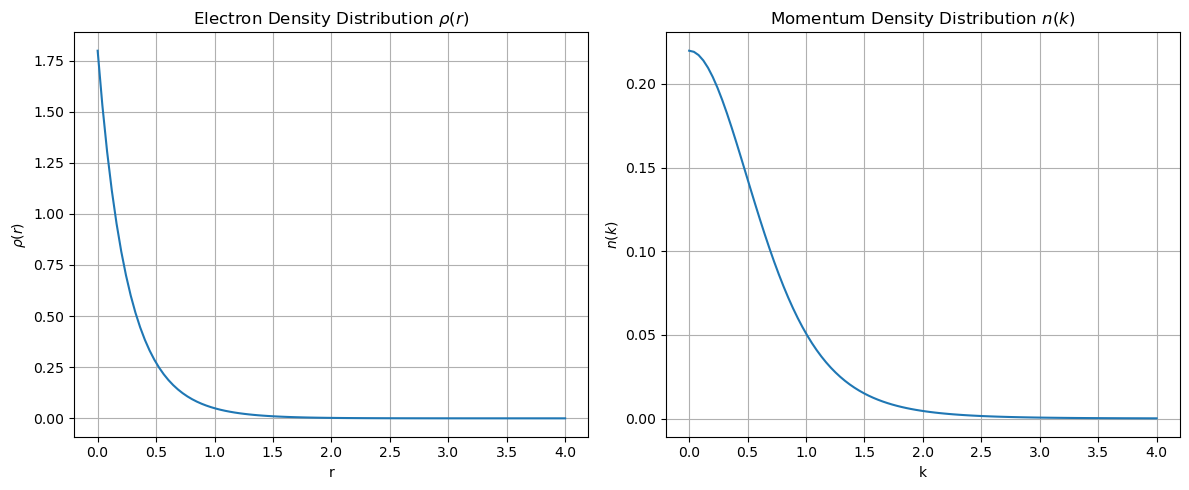

Sr: 2.6985, Sk: 3.9134, S: 6.6119, Smax: 7.0493
 

For the element: Li (lithium)


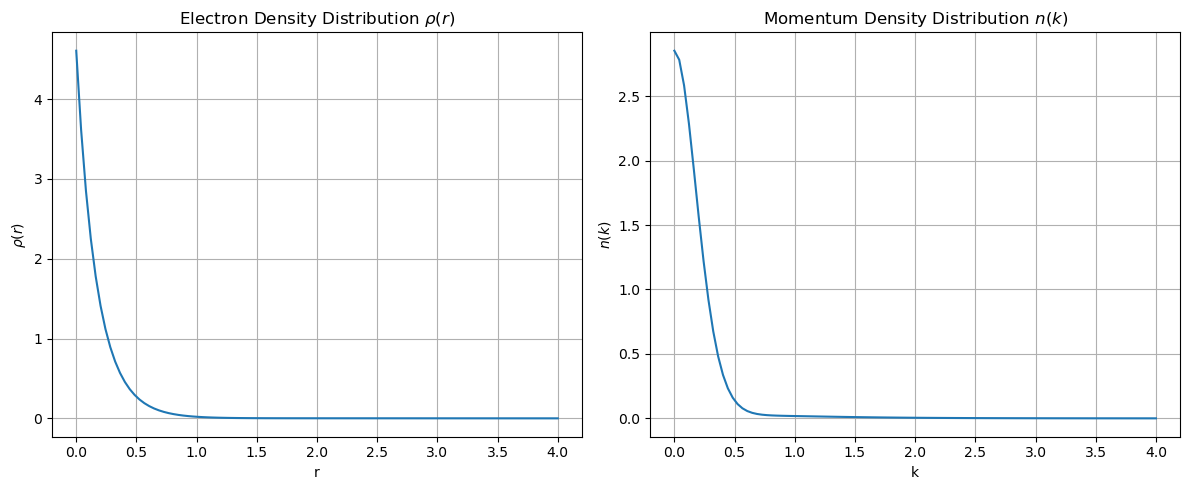

Sr: 3.7014, Sk: 3.9968, S: 7.6983, Smax: 10.3578
 

For the element: Be (beryllium)


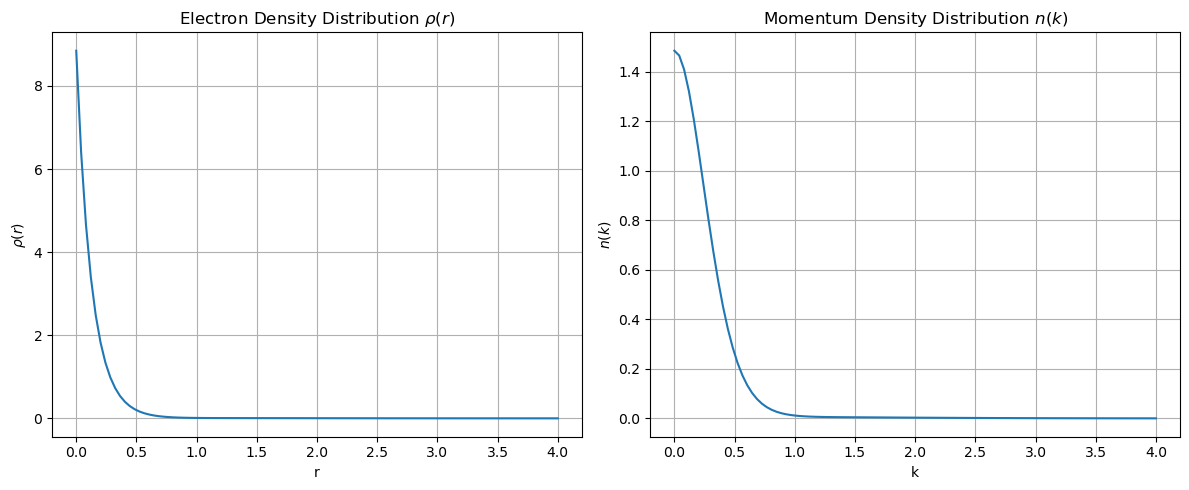

Sr: 3.6239, Sk: 4.1902, S: 7.8140, Smax: 10.3950
 

For the element: B (boron)


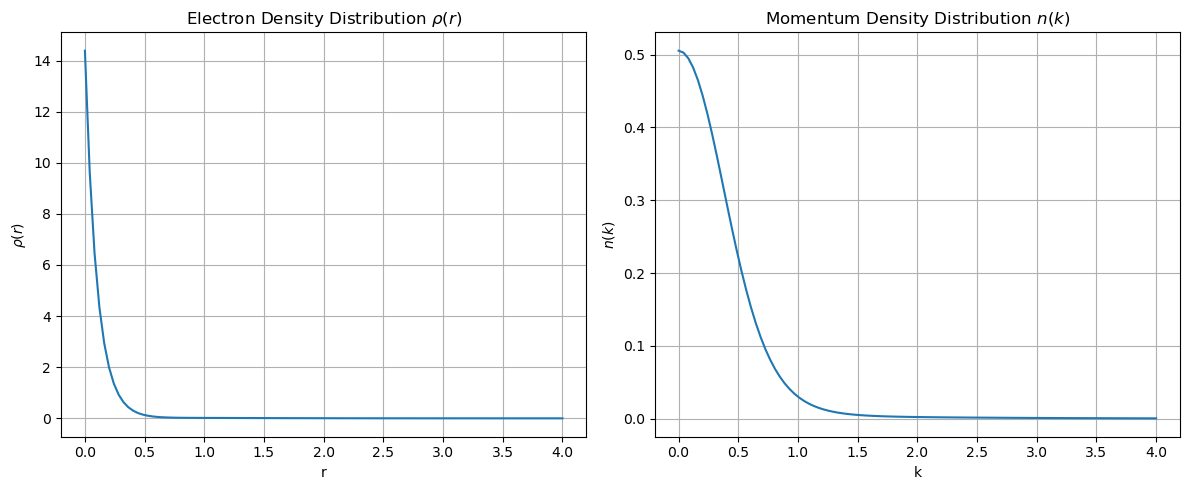

Sr: 3.4054, Sk: 4.7059, S: 8.1113, Smax: 10.3738
 

For the element: C (carbon)


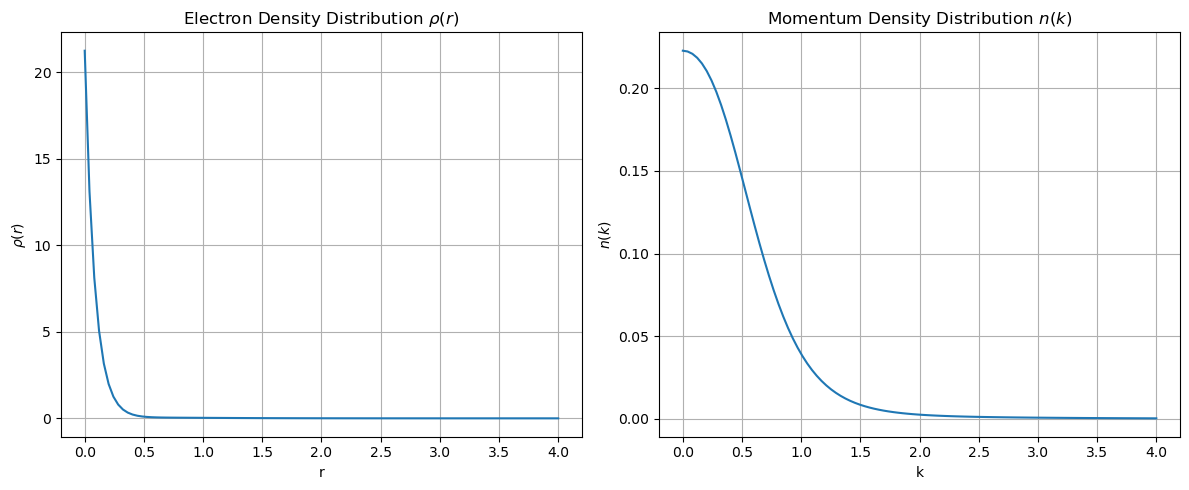

Sr: 3.1060, Sk: 5.1566, S: 8.2626, Smax: 10.2624
 

For the element: N (nitrogen)


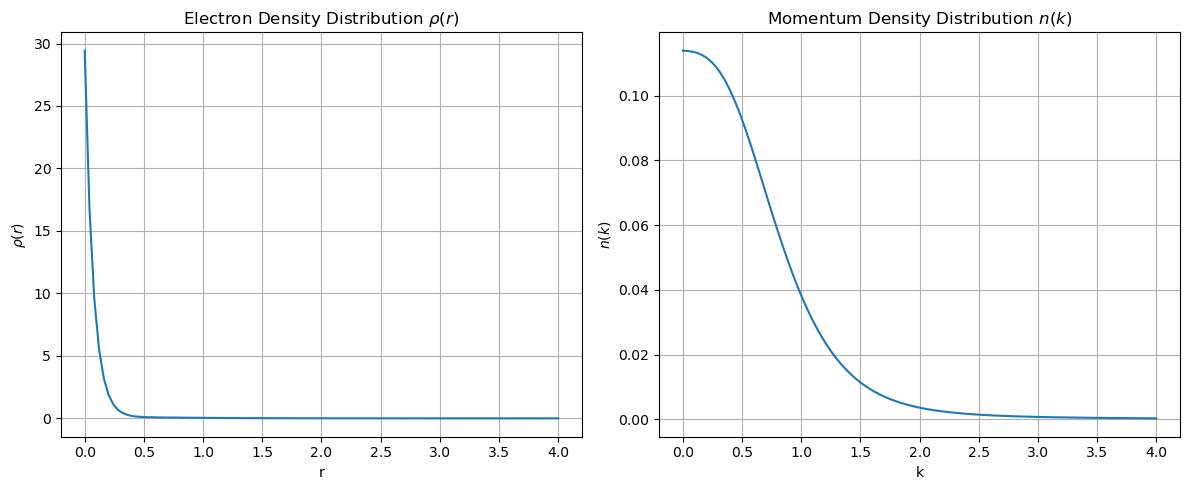

Sr: 2.8017, Sk: 5.5493, S: 8.3510, Smax: 10.1520
 

For the element: O (oxygen)


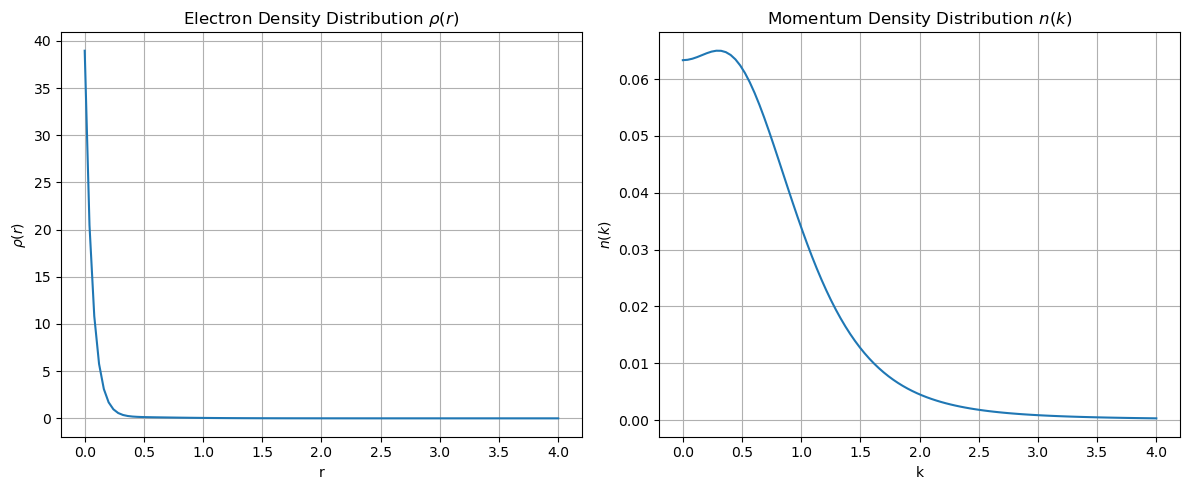

Sr: 2.5505, Sk: 5.8674, S: 8.4179, Smax: 10.1113
 

For the element: F (fluorine)


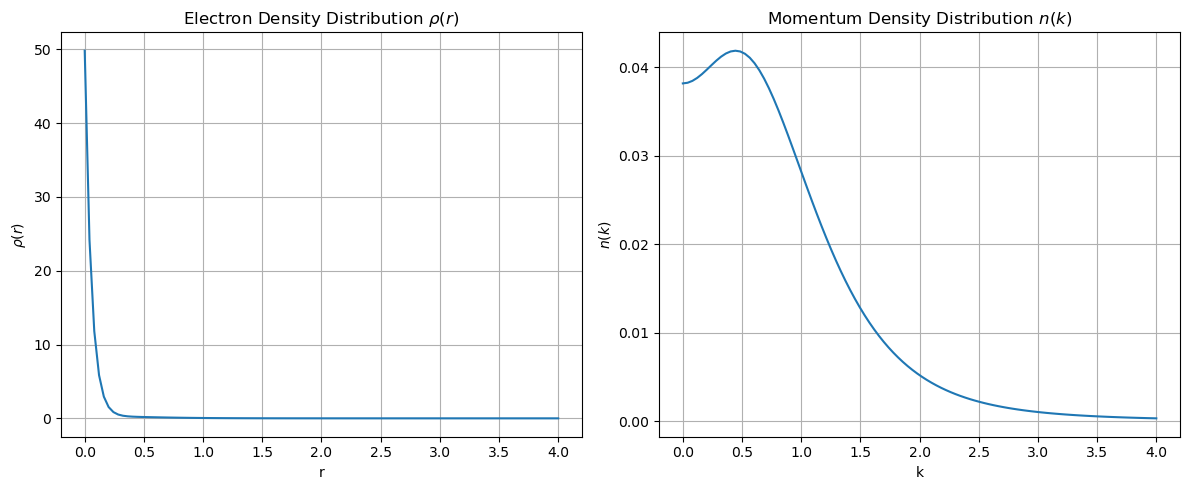

Sr: 2.2989, Sk: 6.1629, S: 8.4619, Smax: 10.0530
 

For the element: Ne (neon)


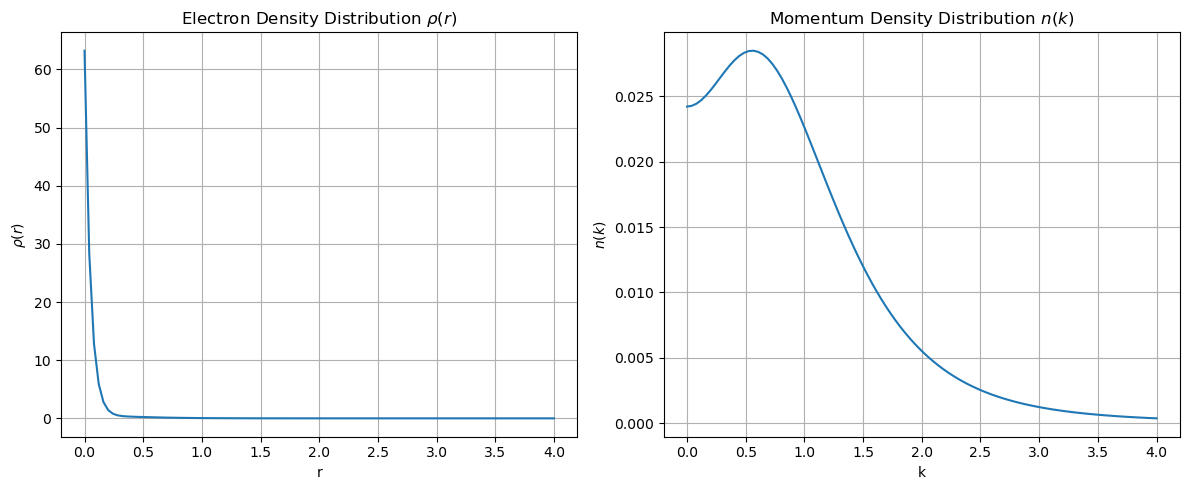

Sr: 2.0449, Sk: 6.4649, S: 8.5098, Smax: 10.0182
 



In [3]:
res = pd.DataFrame(columns=['Sr', 'Sk', 'S', 'Smax'])

for i in range(len(elements)):
    
    c_s = coeff[(coeff['Element'] == elements[i]) & (coeff['orbitals'].str.contains('s'))]
    c_p = coeff[(coeff['Element'] == elements[i]) & (coeff['orbitals'].str.contains('p'))]

    # Calculate properties
    print(f"For the element: {elements[i]} ({periodictable.elements[i+2].name})")
    results = RHF.wavefunction(c_s, c_p, Z=i+2)
    print(f"Sr: {results[0]:.4f}, Sk: {results[1]:.4f}, S: {results[2]:.4f}, Smax: {results[3]:.4f}\n \n")
    
    new_row = pd.DataFrame({
        'Sr': [f"{results[0]:.4f}"],
        'Sk': [f"{results[1]:.4f}"],
        'S': [f"{results[2]:.4f}"],
        'Smax': [f"{results[3]:.4f}"]
    })
    res = pd.concat([res, new_row], ignore_index=True)

## S values

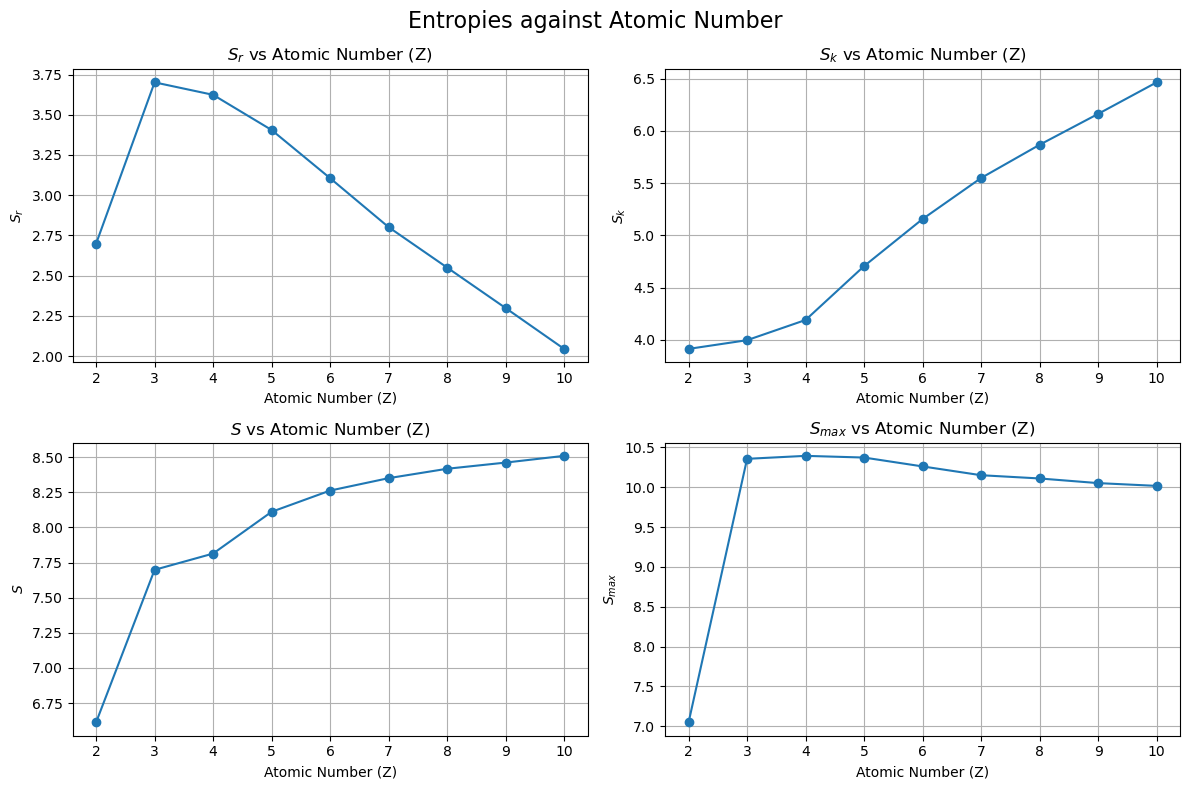

In [9]:
Sr = res['Sr'].astype(float)
Sk = res['Sk'].astype(float)
S = res['S'].astype(float)
Smax = res['Smax'].astype(float)

# plot Sr(Z)
plt.figure(figsize=(12,8))
plt.suptitle("Entropies against Atomic Number", fontsize=16)
plt.subplot(2,2,1)
plt.plot(Z_range, Sr, 'o-')
plt.title(r"$S_r$ vs Atomic Number (Z)")
plt.xlabel(r"Atomic Number (Z)")
plt.ylabel(r"$S_r$")
plt.grid()
#plt.show()

# plot Sk(Z)
#plt.figure(figsize=(12,8))
plt.subplot(2,2,2)
plt.plot(Z_range, Sk, 'o-')
plt.title(r"$S_k$ vs Atomic Number (Z)")
plt.xlabel(r"Atomic Number (Z)")
plt.ylabel(r"$S_k$")
plt.grid()
#plt.show()

# plot S(Z)
#plt.figure(figsize=(12,8))
plt.subplot(2,2,3)
plt.plot(Z_range, S, 'o-')
plt.title(r"$S$ vs Atomic Number (Z)")
plt.xlabel(r"Atomic Number (Z)")
plt.ylabel(r"$S$")
plt.grid()
#plt.show()

# plot Smax(Z)
#plt.figure(figsize=(12,8))
plt.subplot(2,2,4)
plt.plot(Z_range, Smax, 'o-')
plt.title(r"$S_{max}$ vs Atomic Number (Z)")
plt.xlabel(r"Atomic Number (Z)")
plt.ylabel(r"$S_{max}$")
plt.grid()
plt.tight_layout()
plt.show()